In [91]:
#importing Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator ,load_img
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import confusion_matrix
import os
import cv2

In [92]:
print(os.listdir('PetImages'))#to list the data of a directory

['Dog', 'Cat']


In [93]:

def create_training_data(folder,categories):
    training_data=[]
    for category in categories:
        path=os.path.join(folder,category)
        class_num=categories.index(category)
        for image in os.listdir(path):
            try:
                image_array=cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
                image_array=cv2.resize(image_array,(100,100))
                #plt.imshow(image_array)
                #plt.show()
                #print(image_array.shape)
                training_data.append([image_array,class_num])
            except Exception as e:#through exception for broken images
                pass
    return training_data

In [94]:
folder='PetImages'
categories=['Dog','Cat']
training_data=create_training_data(folder,categories)

In [95]:
print(len(training_data))

24946


In [96]:
#shuffle the data
import random

random.shuffle(training_data)

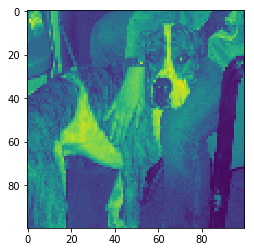

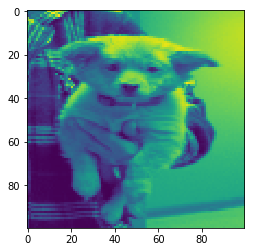

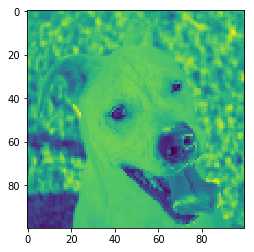

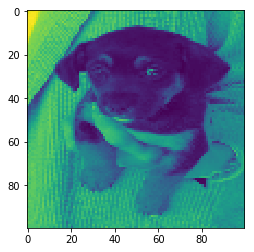

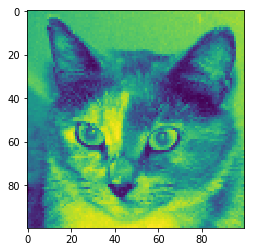

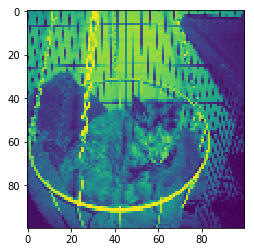

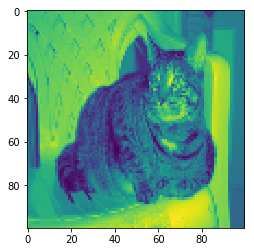

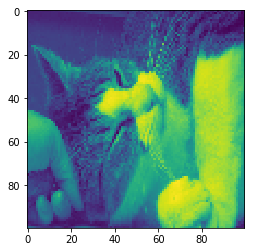

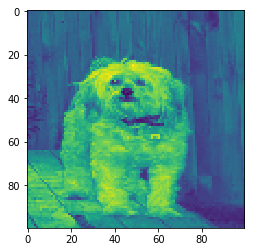

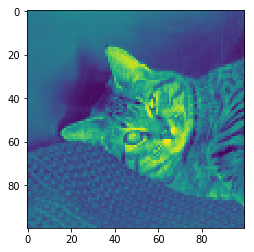

In [103]:
for sample in training_data[:10]:
    plt.imshow(sample[0])
    plt.show()

In [126]:
print(len(training_data))

24946


In [127]:
x = []
y = []
#splitting data in label and faetureset
for features,labels in training_data:
    x.append(features)
    y.append(labels) 

In [129]:
print(len(x))

24946


In [134]:
#scalling the data 
x=x/255.0

print(x[0])

[[0.41176471 0.49803922 0.56078431 ... 0.55294118 0.59607843 0.51372549]
 [0.46666667 0.65098039 0.6745098  ... 0.60392157 0.59607843 0.39215686]
 [0.48627451 0.6627451  0.80784314 ... 0.59607843 0.47843137 0.29019608]
 ...
 [0.24705882 0.25490196 0.25098039 ... 0.18039216 0.17647059 0.18039216]
 [0.23921569 0.25882353 0.24705882 ... 0.19607843 0.19215686 0.17647059]
 [0.25098039 0.2745098  0.31764706 ... 0.19607843 0.20784314 0.20392157]]


In [139]:
x=np.array(x).reshape(-1,100,100,1)
y=np.array(y)

In [140]:
print(x[0])

[[[0.41176471]
  [0.49803922]
  [0.56078431]
  ...
  [0.55294118]
  [0.59607843]
  [0.51372549]]

 [[0.46666667]
  [0.65098039]
  [0.6745098 ]
  ...
  [0.60392157]
  [0.59607843]
  [0.39215686]]

 [[0.48627451]
  [0.6627451 ]
  [0.80784314]
  ...
  [0.59607843]
  [0.47843137]
  [0.29019608]]

 ...

 [[0.24705882]
  [0.25490196]
  [0.25098039]
  ...
  [0.18039216]
  [0.17647059]
  [0.18039216]]

 [[0.23921569]
  [0.25882353]
  [0.24705882]
  ...
  [0.19607843]
  [0.19215686]
  [0.17647059]]

 [[0.25098039]
  [0.2745098 ]
  [0.31764706]
  ...
  [0.19607843]
  [0.20784314]
  [0.20392157]]]


In [143]:
def create_model():
    model = Sequential()
    model.add(Conv2D(8, (3, 3), input_shape=(100,100,1),
                     activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

    model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D())

    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

    model.add(Flatten())
    #model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))


    # compile
    model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy'])

    model.summary()
    return model


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 100, 100, 8)       80        
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 50, 50, 16)        1168      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 12, 12, 64)        18496     
__________

In [144]:
model=create_model()
model.fit(x,y,batch_size=100,epochs=10,verbose=2)

Epoch 1/5
 - 40s - loss: 0.6119 - acc: 0.6543
Epoch 2/5
 - 36s - loss: 0.5016 - acc: 0.7543
Epoch 3/5
 - 31s - loss: 0.4510 - acc: 0.7879
Epoch 4/5
 - 32s - loss: 0.4064 - acc: 0.8131
Epoch 5/5
 - 33s - loss: 0.3663 - acc: 0.8359


In [171]:
def make_prediction(image):
    unknown=cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    unknown=cv2.resize(unknown,(100,100))
    unknown=unknown/255.0
    #plt.imshow(unknown)
    unknown=np.array(unknown).reshape(-1,100,100,1)
    predict=int(model.predict(unknown)>0.5)
    return categories[predict]

In [173]:
image = 'Animal.jpeg'
output=make_prediction(image)
print(output)

Dog


In [174]:
#false prediction for camel image since model does not trainded for the images of camel
image = 'index.jpeg'
output=make_prediction(image)
print(output)

Dog


In [175]:
image = 'cat.jpeg'
output=make_prediction(image)
print(output)

Cat


In [176]:
image = 'images.jpeg'
output=make_prediction(image)
print(output)

Cat


In [180]:
image = 'dog.jpeg'
output=make_prediction(image)
print(output)

Dog
